## You have been hired by a rookie movie producer to help him decide what type of movies to produce and which actors to cast. You have to back your recommendations based on thorough analysis of the data he shared with you which has the list of 3000 movies and the corresponding details.

## As a data scientist, you have to first explore the data and check its sanity.

## Further, you have to answer the following questions:
1. ### <b> Which movie made the highest profit? Who were its producer and director? Identify the actors in that film.</b>
2. ### <b>This data has information about movies made in different languages. Which language has the highest average ROI (return on investment)? </b>
3. ### <b> Find out the unique genres of movies in this dataset.</b>
4. ### <b> Make a table of all the producers and directors of each movie. Find the top 3 producers who have produced movies with the highest average RoI? </b>
5. ### <b> Which actor has acted in the most number of movies? Deep dive into the movies, genres and profits corresponding to this actor. </b>
6. ### <b>Top 3 directors prefer which actors the most? </b>



## Data Exploration

In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Import package
import pandas as pd
import numpy as np

import ast

In [ ]:
file_path = "/content/imdb_data.csv"
imdb_df = pd.read_csv(file_path)

In [ ]:
imdb_df.shape

(3000, 23)

In [ ]:
imdb_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [ ]:
imdb_df.head().T

,0,1,2,3,4
id,1,2,3,4,5
belongs_to_collection,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 107674, 'name': 'The Princess Diaries ...",NaN,NaN,NaN
budget,14000000,40000000,3300000,1200000,0
genres,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 18, 'name': 'Drama'}]","[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...","[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."
homepage,NaN,NaN,http://sonyclassics.com/whiplash/,http://kahaanithefilm.com/,NaN
imdb_id,tt2637294,tt0368933,tt2582802,tt1821480,tt1380152
original_language,en,en,en,hi,ko
original_title,Hot Tub Time Machine 2,The Princess Diaries 2: Royal Engagement,Whiplash,Kahaani,마린보이
overview,"When Lou, who has become the ""father of the In...",Mia Thermopolis is now a college graduate and ...,"Under the direction of a ruthless instructor, ...",Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,Marine Boy is the story of a former national s...
popularity,6.575393,8.248895,64.29999,3.174936,1.14807


In [ ]:
imdb_df.tail()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,...,4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,...,3/28/13,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590
2997,2998,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,...,10/11/96,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761
2998,2999,NaN,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.alongcamepolly.com/,tt0343135,en,Along Came Polly,Reuben Feffer is a guy who's spent his entire ...,15.725542,...,1/16/04,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For the most cautious man on Earth, life is ab...",Along Came Polly,"[{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...","[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386
2999,3000,NaN,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",http://www.abductionthefilm.com/,tt1600195,en,Abduction,A young man sets out to uncover the truth abou...,10.512109,...,9/22/11,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They stole his life. He's taking it back.,Abduction,"[{'id': 591, 'name': 'cia'}, {'id': 822, 'name...","[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155


In [ ]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [ ]:
df = pd.DataFrame(np.random.randint(1, 1000, (100, 5)),
                  columns = ['A', 'B', 'C', 'D', 'E'])
temp_list = ['cat A', 'cat B', 'cat C', 'cat D']*25

df['category'] = temp_list

df

,A,B,C,D,E,category
0,803,124,778,789,694,cat A
1,853,478,149,985,910,cat B
2,475,54,810,515,982,cat C
3,690,701,724,649,386,cat D
4,89,421,182,936,699,cat A
...,...,...,...,...,...,...
95,756,929,483,5,321,cat D
96,503,869,236,357,119,cat A
97,347,649,25,36,136,cat B
98,748,295,940,941,923,cat C


In [ ]:
df.head()

,A,B,C,D,E,category
0,803,124,778,789,694,cat A
1,853,478,149,985,910,cat B
2,475,54,810,515,982,cat C
3,690,701,724,649,386,cat D
4,89,421,182,936,699,cat A


In [ ]:
df.head().T

,0,1,2,3,4
A,803,853,475,690,89
B,124,478,54,701,421
C,778,149,810,724,182
D,789,985,515,649,936
E,694,910,982,386,699
category,cat A,cat B,cat C,cat D,cat A


In [ ]:
df.tail(10)

,A,B,C,D,E,category
90,684,576,383,885,439,cat C
91,59,723,22,501,44,cat D
92,326,613,150,848,608,cat A
93,582,772,430,481,889,cat B
94,163,687,58,63,774,cat C
95,756,929,483,5,321,cat D
96,503,869,236,357,119,cat A
97,347,649,25,36,136,cat B
98,748,295,940,941,923,cat C
99,643,241,878,297,736,cat D


In [ ]:
df.shape

(100, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   A         100 non-null    int64 
 1   B         100 non-null    int64 
 2   C         100 non-null    int64 
 3   D         100 non-null    int64 
 4   E         100 non-null    int64 
 5   category  100 non-null    object
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


# Describe()

**This method gives the overall discriptive summary of the dtaframe. By default this only works for numeric columns**


In [ ]:
df.describe().round(2)

,A,B,C,D,E
count,100.00,100.00,100.00,100.00,100.00
mean,491.25,520.81,490.81,502.79,517.39
std,286.85,295.61,302.32,293.08,288.82
min,11.00,10.00,14.00,5.00,44.00
25%,197.50,247.00,211.75,248.50,253.50
50%,501.50,575.50,462.50,508.50,504.00
75%,726.50,749.25,769.75,738.25,776.50
max,993.00,965.00,998.00,993.00,990.00


In [ ]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
A,100.0,491.25,286.85,11.0,197.50,501.5,726.50,993.0
B,100.0,520.81,295.61,10.0,247.00,575.5,749.25,965.0
C,100.0,490.81,302.32,14.0,211.75,462.5,769.75,998.0
D,100.0,502.79,293.08,5.0,248.50,508.5,738.25,993.0
E,100.0,517.39,288.82,44.0,253.50,504.0,776.50,990.0


In [ ]:
df.describe(include = 'all')

,A,B,C,D,E,category
count,100.00,100.00,100.00,100.00,100.00,100
unique,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,cat A
freq,NaN,NaN,NaN,NaN,NaN,25
mean,491.25,520.81,490.81,502.79,517.39,NaN
std,286.85,295.61,302.32,293.08,288.82,NaN
min,11.00,10.00,14.00,5.00,44.00,NaN
25%,197.50,247.00,211.75,248.50,253.50,NaN
50%,501.50,575.50,462.50,508.50,504.00,NaN
75%,726.50,749.25,769.75,738.25,776.50,NaN


In [ ]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
A,100.0,NaN,NaN,NaN,491.25,286.852173,11.0,197.5,501.5,726.5,993.0
B,100.0,NaN,NaN,NaN,520.81,295.607257,10.0,247.0,575.5,749.25,965.0
C,100.0,NaN,NaN,NaN,490.81,302.323383,14.0,211.75,462.5,769.75,998.0
D,100.0,NaN,NaN,NaN,502.79,293.08241,5.0,248.5,508.5,738.25,993.0
E,100.0,NaN,NaN,NaN,517.39,288.820517,44.0,253.5,504.0,776.5,990.0
category,100,4,cat A,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe(include = 'all').round(2)

,A,B,C,D,E,category
count,100.00,100.00,100.00,100.00,100.00,100
unique,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,cat A
freq,NaN,NaN,NaN,NaN,NaN,25
mean,491.25,520.81,490.81,502.79,517.39,NaN
std,286.85,295.61,302.32,293.08,288.82,NaN
min,11.00,10.00,14.00,5.00,44.00,NaN
25%,197.50,247.00,211.75,248.50,253.50,NaN
50%,501.50,575.50,462.50,508.50,504.00,NaN
75%,726.50,749.25,769.75,738.25,776.50,NaN


In [ ]:
imdb_df.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [ ]:
imdb_df.describe(include ='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,...,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,...,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt2637294,en,Joshua,"When Lou, who has become the ""father of the In...",NaN,...,9/10/10,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,The Magnificent Seven,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,...,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,...,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,...,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,...,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,...,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,...,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


In [ ]:
imdb_df.head(2).T

,0,1
id,1,2
belongs_to_collection,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 107674, 'name': 'The Princess Diaries ..."
budget,14000000,40000000
genres,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
homepage,NaN,NaN
imdb_id,tt2637294,tt0368933
original_language,en,en
original_title,Hot Tub Time Machine 2,The Princess Diaries 2: Royal Engagement
overview,"When Lou, who has become the ""father of the In...",Mia Thermopolis is now a college graduate and ...
popularity,6.575393,8.248895


In [ ]:
imdb_df['crew'][0]

'[{\'credit_id\': \'59ac067c92514107af02c8c8\', \'department\': \'Directing\', \'gender\': 0, \'id\': 1449071, \'job\': \'First Assistant Director\', \'name\': \'Kelly Cantley\', \'profile_path\': None}, {\'credit_id\': \'52fe4ee7c3a36847f82afad7\', \'department\': \'Directing\', \'gender\': 2, \'id\': 3227, \'job\': \'Director\', \'name\': \'Steve Pink\', \'profile_path\': \'/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg\'}, {\'credit_id\': \'5524ed25c3a3687ded000d88\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Writer\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed2d925141720c001128\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Characters\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed3d92514166c1004a5d\', \'department\': \'Production\', \'gender\': 2, \'id\': 57822, \'job\': \'Producer\', \'name\': \'Andrew Panay\', \

In [ ]:
list_str = '[1,2,3,4]'
list1 = eval(list_str)
list1, type(list1)

([1, 2, 3, 4], list)

In [ ]:
list_str = '{1,2,3,4}'
list1 = eval(list_str)
list1, type(list1)

({1, 2, 3, 4}, set)

In [ ]:
list_str = '[1,2,3,4]'
list1 = ast.literal_eval(list_str) # this is also handy :)
list1

[1, 2, 3, 4]

# Slicing and indexing

In [ ]:
data = pd.DataFrame(np.random.randint(5, 30, (30, 5)),
                    columns = ['Column1', 'Column2', 'Column3', 'Column4', 'Column5'])
data

,Column1,Column2,Column3,Column4,Column5
0,29,18,9,20,28
1,10,20,15,28,18
2,22,11,13,12,10
3,12,29,17,17,26
4,16,24,5,18,10
5,20,8,22,12,10
6,28,15,5,29,23
7,27,11,27,26,19
8,6,11,29,25,9
9,16,16,21,21,5


iloc is a one way to do slicing and indexing,
i is integer and loc means location.

eg, data.iloc[row:row, column:column]

In [ ]:
# write a code to subset the row between 10 and 18 and startinf first 3 columns
data.iloc[10:19, :3]

,Column1,Column2,Column3
10,15,23,16
11,28,5,26
12,5,10,9
13,14,27,26
14,14,15,25
15,6,17,7
16,19,20,12
17,19,17,28
18,14,19,16


In [ ]:
data.loc[:9, ['Column1', "Column4"]]

,Column1,Column4
0,29,20
1,10,28
2,22,12
3,12,17
4,16,18
5,20,12
6,28,29
7,27,26
8,6,25
9,16,21


only loc from iloc will work


In [ ]:
imdb_df.loc[:5]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638


In [ ]:
imdb_df.loc[:55, ["imdb_id", "budget", "title", "revenue"]]

,imdb_id,budget,title,revenue
0,tt2637294,14000000,Hot Tub Time Machine 2,12314651
1,tt0368933,40000000,The Princess Diaries 2: Royal Engagement,95149435
2,tt2582802,3300000,Whiplash,13092000
3,tt1821480,1200000,Kahaani,16000000
4,tt1380152,0,Marine Boy,3923970
5,tt0093743,8000000,Pinocchio and the Emperor of the Night,3261638
6,tt0431021,14000000,The Possession,85446075
7,tt0391024,0,Control Room,2586511
8,tt0117110,0,Muppet Treasure Island,34327391
9,tt0310281,6000000,A Mighty Wind,18750246


In [ ]:
imdb_df.loc[: , ["overview"]]

,overview
0,"When Lou, who has become the ""father of the In..."
1,Mia Thermopolis is now a college graduate and ...
2,"Under the direction of a ruthless instructor, ..."
3,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...
4,Marine Boy is the story of a former national s...
...,...
2995,Military men Rock Reilly and Eddie Devane are ...
2996,Three girls in 1980s Stockholm decide to form ...
2997,"Samantha Caine, suburban homemaker, is the ide..."
2998,Reuben Feffer is a guy who's spent his entire ...


### Director Name

In [ ]:
def func(temp):
    try:
        temp_list = eval(temp)

        name = ""
        for d in temp_list:
            if d['job'] == 'Director':
                name = d['name']

        return name
    except:
        return ""

In [ ]:
func(19)

''

In [ ]:
#  Let's create  function to get the director name
def get_director(cast_info):
    try:
        # Convert crew_info from str to list
        cast_info_list = eval(cast_info)

        name_ = ""
        # Extract the Director Name
        for d in cast_info_list:
            job_ = d['job']
            if job_ == 'Director':
                name_ = d['name']
                break

        return name_
    
    except:
        return ""

In [ ]:
imdb_df['director'] = imdb_df['crew'].map(get_director)

In [ ]:
imdb_df[['original_title', 'director']].head()

,original_title,director
0,Hot Tub Time Machine 2,Steve Pink
1,The Princess Diaries 2: Royal Engagement,Garry Marshall
2,Whiplash,Damien Chazelle
3,Kahaani,Sujoy Ghosh
4,마린보이,Jong-seok Yoon


### List of Producers

In [ ]:
#  Let's create  function to get the producer name
def get_producers(cast_info):
    try:
        # Convert crew_info from str to list
        cast_info_list = eval(cast_info)

        # Extract the Producer Name
        producer_list = []
        for d in cast_info_list:
            job_ = d['job']
            if job_ == 'Producer':
                name_ = d['name']
                producer_list.append(name_)

        return producer_list
    
    except:
        return []

In [ ]:
imdb_df['producers'] = imdb_df['crew'].map(get_producers)

In [ ]:
imdb_df[['original_title', 'director', 'producers']].head()

,original_title,director,producers
0,Hot Tub Time Machine 2,Steve Pink,[Andrew Panay]
1,The Princess Diaries 2: Royal Engagement,Garry Marshall,"[Whitney Houston, Mario Iscovich, Debra Martin..."
2,Whiplash,Damien Chazelle,"[David Lancaster, Michel Litvak, Jason Blum, H..."
3,Kahaani,Sujoy Ghosh,[Sujoy Ghosh]
4,마린보이,Jong-seok Yoon,[]


### List of First 5 Actors

In [ ]:
#  Let's create  function to get the Actors name
def get_actors(cast_info):
    try:
        # Convert cast_info from str to list
        cast_info_list = ast.literal_eval(cast_info)

        # Extract the Actor Name
        actors_list = []
        for d in cast_info_list:
            name_ = d['name']
            actors_list.append(name_)

        return actors_list[:5] # return first 5 actors
    
    except:
        return []

In [ ]:
imdb_df['actors'] = imdb_df['cast'].map(get_actors)

### List of genres

In [ ]:
try:
    50/0
except Exception as e:
    print(e)

division by zero


In [ ]:
#  Let's create  function to get the Genres
def get_genres(genre_info):
    try:
        # Convert cast_info from str to list
        genre_info_list = ast.literal_eval(genre_info)

        # Extract the Genre Name
        genres_list = []
        for d in genre_info_list:
            name_ = d['name']
            genres_list.append(name_)

        return genres_list
    
    except Exception as e:
        return []

In [ ]:
temp = imdb_df['genres'][0]
temp

"[{'id': 35, 'name': 'Comedy'}]"

In [ ]:
get_genres(temp)

['Comedy']

In [ ]:
imdb_df['genres_list'] = imdb_df['genres'].map(get_genres)

In [ ]:
imdb_df[['genres', 'genres_list']]

,genres,genres_list
0,"[{'id': 35, 'name': 'Comedy'}]",[Comedy]
1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Family, Romance]"
2,"[{'id': 18, 'name': 'Drama'}]",[Drama]
3,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...","[Thriller, Drama]"
4,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...","[Action, Thriller]"
...,...,...
2995,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...","[Comedy, Romance]"
2996,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...","[Drama, Music]"
2997,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...","[Crime, Action, Mystery, Thriller]"
2998,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...","[Comedy, Romance]"


## 1. Which movie made the highest profit? Who were its producer and director? Identify the actors in that film.

In [ ]:
# Let's calculate profit = revenue - budget
imdb_df['profit'] = imdb_df['revenue'] - imdb_df['budget']

In [ ]:
imdb_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'director', 'producers', 'actors', 'genres_list', 'profit'],
      dtype='object')

In [ ]:
dummy = pd.DataFrame()
dummy['P'] = ['A', 'b', 'C']
dummy['sale'] = [100, 120, 99]
dummy[dummy['sale'] == dummy['sale'].max()]

,P,sale
1,b,120


In [ ]:
cols_to_work = ['original_title',  'profit', 'director', 'producers', 'actors']

In [ ]:
# Which movie made the highest profit?
max_profit = imdb_df['profit'].max()

op = imdb_df[imdb_df['profit'] == max_profit][cols_to_work]

op

,original_title,profit,director,producers,actors
1761,Furious 7,1316249360,James Wan,"[Vin Diesel, Neal H. Moritz, Michael Fottrell,...","[Vin Diesel, Paul Walker, Dwayne Johnson, Mich..."


## This data has information about movies made in different languages. Which language has the highest average ROI (return on investment)?

In [ ]:
imdb_df['original_language'].value_counts()

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
de      18
ta      16
sv       8
nl       6
pt       6
fa       5
da       5
ro       4
hu       3
tr       3
no       2
ml       2
pl       2
te       2
fi       2
ur       1
he       1
el       1
ar       1
nb       1
vi       1
mr       1
cs       1
sr       1
bn       1
id       1
Name: original_language, dtype: int64

In [ ]:
budget_ = 100
revenue_ = 110
profit_ = revenue_ - budget_
roi_ = (profit_/budget_)*100
roi_

10.0

In [ ]:
# Let's calculate %ROI = (profit/budget)*100
imdb_df['roi'] = (imdb_df['profit']/imdb_df['budget'])*100

In [ ]:
imdb_df[['original_title', 'revenue', 'budget', 'profit', 'roi']]

,original_title,revenue,budget,profit,roi
0,Hot Tub Time Machine 2,12314651,14000000,-1685349,-12.038207
1,The Princess Diaries 2: Royal Engagement,95149435,40000000,55149435,137.873588
2,Whiplash,13092000,3300000,9792000,296.727273
3,Kahaani,16000000,1200000,14800000,1233.333333
4,마린보이,3923970,0,3923970,inf
...,...,...,...,...,...
2995,Chasers,1596687,0,1596687,inf
2996,Vi är bäst!,180590,0,180590,inf
2997,The Long Kiss Goodnight,89456761,65000000,24456761,37.625786
2998,Along Came Polly,171963386,42000000,129963386,309.436633


In [ ]:
imdb_df2 = imdb_df[imdb_df['budget']>10000]
imdb_df2[['original_title', 'revenue', 'budget', 'profit', 'roi']]

,original_title,revenue,budget,profit,roi
0,Hot Tub Time Machine 2,12314651,14000000,-1685349,-12.038207
1,The Princess Diaries 2: Royal Engagement,95149435,40000000,55149435,137.873588
2,Whiplash,13092000,3300000,9792000,296.727273
3,Kahaani,16000000,1200000,14800000,1233.333333
5,Pinocchio and the Emperor of the Night,3261638,8000000,-4738362,-59.229525
...,...,...,...,...,...
2992,The Thief of Bagdad,1213880,1135654,78226,6.888190
2993,The Terminal,219417255,60000000,159417255,265.695425
2997,The Long Kiss Goodnight,89456761,65000000,24456761,37.625786
2998,Along Came Polly,171963386,42000000,129963386,309.436633


In [ ]:
imdb_df2[['profit', 'budget', 'roi']].describe().astype(int)

,profit,budget,roi
count,2165,2165,2165
mean,56584971,31221234,1135
std,129147054,40354471,29114
min,-107447384,11178,-99
25%,-1700000,5952000,-21
50%,10867586,16800000,100
75%,63054825,40000000,308
max,1316249360,380000000,1288938


In [ ]:
cols_to_work = ['original_title', 'profit', 'budget', 'roi',  'original_language']

imdb_df_roi_df = imdb_df2[cols_to_work]

imdb_df_roi_df

,original_title,profit,budget,roi,original_language
0,Hot Tub Time Machine 2,-1685349,14000000,-12.038207,en
1,The Princess Diaries 2: Royal Engagement,55149435,40000000,137.873588,en
2,Whiplash,9792000,3300000,296.727273,en
3,Kahaani,14800000,1200000,1233.333333,hi
5,Pinocchio and the Emperor of the Night,-4738362,8000000,-59.229525,en
...,...,...,...,...,...
2992,The Thief of Bagdad,78226,1135654,6.888190,en
2993,The Terminal,159417255,60000000,265.695425,en
2997,The Long Kiss Goodnight,24456761,65000000,37.625786,en
2998,Along Came Polly,129963386,42000000,309.436633,en


<AxesSubplot:xlabel='original_language'>

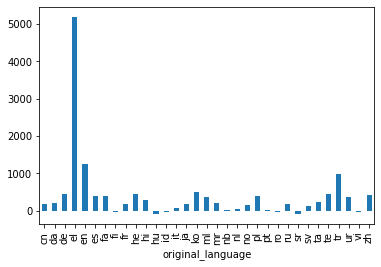

In [ ]:
imdb_df_roi_df.groupby('original_language')['roi'].mean().plot(kind='bar')

In [ ]:
imdb_df_roi_df.groupby('original_language')['roi'].mean().reset_index().head()

,original_language,roi
0,cn,173.866111
1,da,191.396370
2,de,434.906683
3,el,5198.013245
4,en,1244.612449


In [ ]:
lang_roi = imdb_df_roi_df.groupby('original_language')['roi'].mean().reset_index()

lang_roi.rename(columns = {'roi': 'avg_roi'}, inplace = True)

lang_roi['avg_roi'] = lang_roi['avg_roi'].round(2)

lang_roi = lang_roi.sort_values(by = 'avg_roi', ascending = False)

lang_roi.head()

,original_language,avg_roi
3,el,5198.01
4,en,1244.61
29,tr,966.00
15,ko,486.78
9,he,456.29


In [ ]:
max_roi = lang_roi['avg_roi'].max()

lang_roi[lang_roi['avg_roi'] == max_roi]

,original_language,avg_roi
3,el,5198.01


## 3. Find out the unique genres of movies in this dataset

In [ ]:
imdb_df['genres_list'].map(len)

0       1
1       4
2       1
3       2
4       2
       ..
2995    2
2996    2
2997    4
2998    2
2999    3
Name: genres_list, Length: 3000, dtype: int64

In [ ]:
imdb_df['genres_count'] = imdb_df['genres_list'].map(len)

In [ ]:
cols_to_work = ['original_title', 'genres_list', 'genres_count']
genre_data = imdb_df[cols_to_work]

genre_data = genre_data.sort_values(by = 'genres_count', ascending = False)

genre_data

,original_title,genres_list,genres_count
1755,Fishtales,"[Fantasy, Drama, Comedy, Science Fiction, Roma...",7
1080,Jimmy Neutron: Boy Genius,"[Action, Adventure, Animation, Comedy, Family,...",7
2177,Crossroads,"[Action, Adventure, Comedy, Drama, Family, Mus...",7
2442,Race to Witch Mountain,"[Adventure, Family, Fantasy, Science Fiction, ...",6
1624,Hercules,"[Animation, Family, Fantasy, Adventure, Comedy...",6
...,...,...,...
1814,Курочка Ряба,[],0
2423,Amarkalam,[],0
470,"The Book of Mormon Movie, Volume 1: The Journey",[],0
1622,Jackpot,[],0


In [ ]:
data = pd.DataFrame()

data['C1'] = ['A' , 'B']
data['C2'] = [[1,2,3] , [4,5]]

In [ ]:
data

,C1,C2
0,A,"[1, 2, 3]"
1,B,"[4, 5]"


In [ ]:
data.explode('C2')

,C1,C2
0,A,1
0,A,2
0,A,3
1,B,4
1,B,5


In [ ]:
genre_data = genre_data.explode('genres_list')
genre_count = genre_data['genres_list'].value_counts()
genre_count

Drama              1531
Comedy             1028
Thriller            789
Action              741
Romance             571
Crime               469
Adventure           439
Horror              301
Science Fiction     290
Family              260
Fantasy             232
Mystery             225
Animation           141
History             132
War                 100
Music               100
Documentary          87
Western              43
Foreign              31
TV Movie              1
Name: genres_list, dtype: int64

In [ ]:
type(genre_count)

pandas.core.series.Series

<AxesSubplot:>

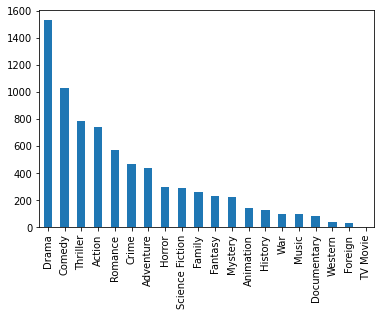

In [ ]:
## Bonus
genre_count.plot(kind='bar')

## 4.Make a table of all the producers and directors of each movie. Find the top 3 producers who have produced movies with the highest average RoI?

In [ ]:
cols_to_work = ['original_title', 'producers', 'budget', 'roi']
producer_roi = imdb_df[cols_to_work]
producer_roi

,original_title,producers,budget,roi
0,Hot Tub Time Machine 2,[Andrew Panay],14000000,-12.038207
1,The Princess Diaries 2: Royal Engagement,"[Whitney Houston, Mario Iscovich, Debra Martin...",40000000,137.873588
2,Whiplash,"[David Lancaster, Michel Litvak, Jason Blum, H...",3300000,296.727273
3,Kahaani,[Sujoy Ghosh],1200000,1233.333333
4,마린보이,[],0,inf
...,...,...,...,...
2995,Chasers,[James G. Robinson],0,inf
2996,Vi är bäst!,[Lars J√∂nsson],0,inf
2997,The Long Kiss Goodnight,"[Stephanie Austin, Shane Black, Renny Harlin, ...",65000000,37.625786
2998,Along Came Polly,"[Danny DeVito, Michael Shamberg, Stacey Sher]",42000000,309.436633


In [ ]:
producer_roi = producer_roi.explode('producers')

In [ ]:
# Lets filter out budget
producer_roi = producer_roi[producer_roi['budget']>10000]
producer_roi

,original_title,producers,budget,roi
0,Hot Tub Time Machine 2,Andrew Panay,14000000,-12.038207
1,The Princess Diaries 2: Royal Engagement,Whitney Houston,40000000,137.873588
1,The Princess Diaries 2: Royal Engagement,Mario Iscovich,40000000,137.873588
1,The Princess Diaries 2: Royal Engagement,Debra Martin Chase,40000000,137.873588
2,Whiplash,David Lancaster,3300000,296.727273
...,...,...,...,...
2999,Abduction,Doug Davison,35000000,134.534729
2999,Abduction,Roy Lee,35000000,134.534729
2999,Abduction,Ellen Goldsmith-Vein,35000000,134.534729
2999,Abduction,Dan Lautner,35000000,134.534729


In [ ]:
# Avgerage ROI per producer
producer_roi_avg = producer_roi.groupby('producers')['roi'].mean().reset_index()

# Rename the roi column to avg_roi
producer_roi_avg.rename(columns = {"roi": "Avg. roi"}, inplace = True)

# Sort the data on avg roi
producer_roi_avg.sort_values(by = 'Avg. roi', ascending=False, inplace=True)

# TOP 3 Producer : having the highest ROI
producer_roi_avg.head(3)

,producers,Avg. roi
111,Amir Zbeda,1.288939e+06
2265,Robin Cowie,4.132333e+05
936,Gregg Hale,4.132333e+05


In [ ]:
producer_roi_avg.head(20)

,producers,Avg. roi
111,Amir Zbeda,1.288939e+06
2265,Robin Cowie,4.132333e+05
936,Gregg Hale,4.132333e+05
1991,Oren Peli,3.243341e+05
1111,Jason Blum,9.379464e+04
1304,John Waters,4.990000e+04
423,Charles B. Pierce,2.190000e+04
513,D.W. Griffith,1.090000e+04
2088,Peter Locke,1.076957e+04
1872,Michael White,9.307693e+03


## Which actor has acted in the most number of movies? Deep dive into the movies, genres and profits corresponding to this actor.

In [ ]:
cols_to_work = ['original_title', 'actors', 'genres_list', 'profit']
actor_df = imdb_df[cols_to_work]
actor_df

,original_title,actors,genres_list,profit
0,Hot Tub Time Machine 2,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",[Comedy],-1685349
1,The Princess Diaries 2: Royal Engagement,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Comedy, Drama, Family, Romance]",55149435
2,Whiplash,"[Miles Teller, J.K. Simmons, Melissa Benoist, ...",[Drama],9792000
3,Kahaani,"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Thriller, Drama]",14800000
4,마린보이,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[Action, Thriller]",3923970
...,...,...,...,...
2995,Chasers,"[Tom Berenger, William McNamara, –≠—Ä–∏–∫–∞ –≠...","[Comedy, Romance]",1596687
2996,Vi är bäst!,"[Mira Barkhammar, Mira Grosin, Liv LeMoyne, Da...","[Drama, Music]",180590
2997,The Long Kiss Goodnight,"[Geena Davis, Samuel L. Jackson, Yvonne Zima, ...","[Crime, Action, Mystery, Thriller]",24456761
2998,Along Came Polly,"[Ben Stiller, Jennifer Aniston, Philip Seymour...","[Comedy, Romance]",129963386


In [ ]:
actor_df = actor_df.explode('actors')
actor_df

,original_title,actors,genres_list,profit
0,Hot Tub Time Machine 2,Rob Corddry,[Comedy],-1685349
0,Hot Tub Time Machine 2,Craig Robinson,[Comedy],-1685349
0,Hot Tub Time Machine 2,Clark Duke,[Comedy],-1685349
0,Hot Tub Time Machine 2,Adam Scott,[Comedy],-1685349
0,Hot Tub Time Machine 2,Chevy Chase,[Comedy],-1685349
...,...,...,...,...
2999,Abduction,Taylor Lautner,"[Thriller, Action, Mystery]",47087155
2999,Abduction,Lily Collins,"[Thriller, Action, Mystery]",47087155
2999,Abduction,Alfred Molina,"[Thriller, Action, Mystery]",47087155
2999,Abduction,Jason Isaacs,"[Thriller, Action, Mystery]",47087155


In [ ]:
# the most number of movies

actor_movie_cnt = actor_df.groupby('actors')['original_title'].count().reset_index()

actor_movie_cnt.sort_values(by = 'original_title', ascending = False, inplace=True)

actor_movie_cnt

,actors,original_title
6167,Robert De Niro,28
6423,Samuel L. Jackson,21
990,Bruce Willis,20
5275,Morgan Freeman,20
6898,Susan Sarandon,20
...,...,...
2998,Jack Lowden,1
2996,Jack La Rue,1
2995,Jack Kehler,1
2993,Jack Holt,1


In [ ]:
actor_df['actors'].value_counts()

Robert De Niro           28
Samuel L. Jackson        21
Bruce Willis             20
Susan Sarandon           20
Mel Gibson               20
                         ..
Caroline Williams         1
Ellen Hamilton Latzen     1
Egor Beroev               1
Anna Kovalchuk            1
Tom Amandes               1
Name: actors, Length: 7718, dtype: int64

In [ ]:
max_cnt = actor_movie_cnt['original_title'].max()

temp = actor_movie_cnt[actor_movie_cnt['original_title'] ==max_cnt]

actor_name = temp['actors'].tolist()[0]

actor_name

'Robert De Niro'

In [ ]:
top_actor_df = actor_df[actor_df['actors']== actor_name]
top_actor_df

,original_title,actors,genres_list,profit
409,This Boy’s Life,Robert De Niro,[Drama],4104962
506,What Just Happened,Robert De Niro,"[Comedy, Drama]",-18326578
553,Mad Dog and Glory,Robert De Niro,"[Comedy, Crime, Romance, Drama]",11081586
704,The Good Shepherd,Robert De Niro,"[Drama, Thriller, History]",-25091435
752,Lenny Bruce: Swear to Tell the Truth,Robert De Niro,"[Comedy, Documentary]",21350
805,Red Lights,Robert De Niro,[Thriller],-448826
1170,Falling in Love,Robert De Niro,"[Drama, Romance]",11129057
1192,Wag the Dog,Robert De Niro,"[Comedy, Drama]",49256513
1217,Meet the Parents,Robert De Niro,"[Comedy, Romance]",275444045
1374,Marvin's Room,Robert De Niro,[Drama],-10196695


## Top 3 directors prefer which actors the most?
### H:W :)

In [ ]:
cols_to_work = ['original_title', 'director', 'actors', 'profit']
director_df = imdb_df[cols_to_work]
director_df

,original_title,director,actors,profit
0,Hot Tub Time Machine 2,Steve Pink,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",-1685349
1,The Princess Diaries 2: Royal Engagement,Garry Marshall,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",55149435
2,Whiplash,Damien Chazelle,"[Miles Teller, J.K. Simmons, Melissa Benoist, ...",9792000
3,Kahaani,Sujoy Ghosh,"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",14800000
4,마린보이,Jong-seok Yoon,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...",3923970
...,...,...,...,...
2995,Chasers,Dennis Hopper,"[Tom Berenger, William McNamara, –≠—Ä–∏–∫–∞ –≠...",1596687
2996,Vi är bäst!,Lukas Moodysson,"[Mira Barkhammar, Mira Grosin, Liv LeMoyne, Da...",180590
2997,The Long Kiss Goodnight,Renny Harlin,"[Geena Davis, Samuel L. Jackson, Yvonne Zima, ...",24456761
2998,Along Came Polly,John Hamburg,"[Ben Stiller, Jennifer Aniston, Philip Seymour...",129963386


In [ ]:
# Filter out where director is ""
director_df = director_df[director_df['director'] != ""]

In [ ]:
# Top 3 directors - On the basis Number of movies
director_df['director'].value_counts().head(3)

Ron Howard          11
Clint Eastwood      11
Steven Spielberg    10
Name: director, dtype: int64

In [ ]:
# Top 3 directors 
top_3_d = list(director_df['director'].value_counts().head(3).index)

In [ ]:
# single == single
# isin for a list of values

In [ ]:
# Filter out top 3 director
director_df_top3 = director_df[director_df['director'].isin(top_3_d)]
director_df_top3 = director_df_top3.explode('actors')

In [ ]:
director_df_top3['actors'].value_counts().head(10)

Clint Eastwood      8
Tom Hanks           4
Ed Harris           3
Harrison Ford       3
Laura Dern          2
Richard Dreyfuss    2
Kevin Bacon         2
Gary Sinise         2
Pat Hingle          2
Amy Ryan            2
Name: actors, dtype: int64

## EXTRA - Rough Work

In [ ]:
temp = imdb_df['crew'][234]

print(temp)

[{'credit_id': '58a861f19251415691009352', 'department': 'Sound', 'gender': 0, 'id': 1760460, 'job': 'Music', 'name': 'Christopher Spelman', 'profile_path': None}, {'credit_id': '549f54ad9251411d530038f8', 'department': 'Directing', 'gender': 2, 'id': 20561, 'job': 'Director', 'name': 'James Gray', 'profile_path': '/26NM43boSYspJiKeRc0gy41g9sA.jpg'}, {'credit_id': '549f55289251414e280046d9', 'department': 'Writing', 'gender': 2, 'id': 20561, 'job': 'Writer', 'name': 'James Gray', 'profile_path': '/26NM43boSYspJiKeRc0gy41g9sA.jpg'}, {'credit_id': '549f56cfc3a368764f00545e', 'department': 'Production', 'gender': 0, 'id': 20458, 'job': 'Producer', 'name': 'Dede Gardner', 'profile_path': None}, {'credit_id': '5635755c9251412857019218', 'department': 'Camera', 'gender': 2, 'id': 2240, 'job': 'Director of Photography', 'name': 'Darius Khondji', 'profile_path': None}, {'credit_id': '58a86135c3a368661a0093cd', 'department': 'Writing', 'gender': 0, 'id': 1468319, 'job': 'Book', 'name': 'David G

In [ ]:
type(temp)

str

In [ ]:
import ast

In [ ]:
list1 = [1,2,3,4]
list2 = '[1,2,3,4]'

ast.literal_eval(list2)

[1, 2, 3, 4]

In [ ]:
# Let's fix the data type
temp_list = ast.literal_eval(temp)
type(temp_list)

list

In [ ]:
# Producer

producer_list = []
for d in temp_list:
    job_ = d['job']
    if job_ == 'Producer':
        name_ = d['name']
        print(name_)
        producer_list.append(name_)
    
print(producer_list)

Dede Gardner
James Gray
Dale Armin Johnson
Anthony Katagas
Jeremy Kleiner
['Dede Gardner', 'James Gray', 'Dale Armin Johnson', 'Anthony Katagas', 'Jeremy Kleiner']


In [ ]:
# Director
for d in temp_list:
    job_ = d['job']
    if job_ == 'Director':
        name_ = d['name']
        print(name_)

James Gray


In [ ]:
#  Let's create  function to get the director name
def get_director(crew_info):
    try:
        # Convert crew_info from str to list
        crew_info_list = ast.literal_eval(crew_info)

        # Extract the Director Name
        for d in crew_info_list:
            job_ = d['job']
            if job_ == 'Director':
                name_ = d['name']
                break

        return name_
    
    except:
        return ""

In [ ]:
#  Let's create  function to get the producer name
def get_producers(crew_info):
    try:
        # Convert crew_info from str to list
        crew_info_list = ast.literal_eval(crew_info)

        # Extract the Producer Name
        producer_list = []
        for d in crew_info_list:
            job_ = d['job']
            if job_ == 'Producer':
                name_ = d['name']
                producer_list.append(name_)

        return producer_list
    
    except:
        return []

In [ ]:
temp = imdb_df['cast'][0]

print(temp)

[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'character'

In [ ]:
temp_list = ast.literal_eval(temp)

In [ ]:
for d in temp_list:
    print(d)

{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}
{'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}
{'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}
{'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}
{'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}
{'cast_id': 9, 'character': 'Jil

In [ ]:
# Actors

actor_list = []
for d in temp_list:
    name_ = d['name']
    print(name_)
    actor_list.append(name_)
    
print(actor_list[:5])

Rob Corddry
Craig Robinson
Clark Duke
Adam Scott
Chevy Chase
Gillian Jacobs
Bianca Haase
Collette Wolfe
Kumail Nanjiani
Kellee Stewart
Josh Heald
Gretchen Koerner
Lisa Loeb
Jessica Williams
Bruce Buffer
Mariana Paola Vicente
Christian Slater
Jason Jones
Olivia Jordan
Christine Bently
Stacey Asaro
John Cusack
Adam Herschman
Kisha Sierra
['Rob Corddry', 'Craig Robinson', 'Clark Duke', 'Adam Scott', 'Chevy Chase']


In [ ]:
#  Let's create  function to get the Actors name
def get_actors(cast_info):
    try:
        # Convert cast_info from str to list
        cast_info_list = ast.literal_eval(cast_info)

        # Extract the Actor Name
        actors_list = []
        for d in cast_info_list:
            name_ = d['name']
            actors_list.append(name_)

        return actors_list[:5] # return first 5 actors
    
    except:
        return []

In [ ]:
temp = producer_roi.head(3)

In [ ]:
temp

,producers,roi
0,[Andrew Panay],-12.038207
1,"[Whitney Houston, Mario Iscovich, Debra Martin...",137.873588
2,"[David Lancaster, Michel Litvak, Jason Blum, H...",296.727273


In [ ]:
temp.explode('producers')

,producers,roi
0,Andrew Panay,-12.038207
1,Whitney Houston,137.873588
1,Mario Iscovich,137.873588
1,Debra Martin Chase,137.873588
2,David Lancaster,296.727273
2,Michel Litvak,296.727273
2,Jason Blum,296.727273
2,Helen Estabrook,296.727273
